# Cargar recursos

In [2]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 75% 15.0M/20.1M [00:00<00:00, 154MB/s]
100% 20.1M/20.1M [00:00<00:00, 182MB/s]


In [4]:
!unzip udea*.zip > /dev/null

In [5]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


In [6]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 12)


In [7]:
from rlxutils import subplots
import matplotlib.pyplot as plt

In [8]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


# Preprocesado de datos
En base a la exploracion de los datos, escogi trabajar con las siguientes columnas:

-ESTU_VALORMATRICULAUNIVERSIDAD

-ESTU_HORASSEMANATRABAJA

-FAMI_ESTRATOVIVIENDA

-FAMI_TIENEINTERNET

RENDIMIENTO_GLOBAL

In [9]:
datos = z[['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'RENDIMIENTO_GLOBAL' ]]
datos.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,medio-alto
1,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,bajo
2,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,bajo
3,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,alto
4,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,medio-bajo


Limpieza de datos nulos

In [10]:
sum(datos.ESTU_VALORMATRICULAUNIVERSIDAD.isna()), sum(datos.ESTU_HORASSEMANATRABAJA.isna()), sum(datos.FAMI_ESTRATOVIVIENDA.isna()), sum(datos.FAMI_TIENEINTERNET.isna())

(6287, 30857, 32137, 26629)

In [11]:
datos.ESTU_VALORMATRICULAUNIVERSIDAD.values[datos.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
datos.ESTU_HORASSEMANATRABAJA.values[datos.ESTU_HORASSEMANATRABAJA.isna()] = 'no info'
datos.FAMI_ESTRATOVIVIENDA.values[datos.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'
datos.FAMI_TIENEINTERNET.values[datos.FAMI_TIENEINTERNET.isna()] = 'no info'
sum(datos.ESTU_VALORMATRICULAUNIVERSIDAD.isna()), sum(datos.ESTU_HORASSEMANATRABAJA.isna()), sum(datos.FAMI_ESTRATOVIVIENDA.isna()), sum(datos.FAMI_TIENEINTERNET.isna())

(0, 0, 0, 0)

Limpieza de ESTU_VALORMATRICULAUNIVERSIDAD

In [12]:
vmat = {'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': 0.25,
 'Entre 500 mil y menos de 1 millón': 0.75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0,
 'no info': -1}

datos.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[vmat[i] for i in datos.ESTU_VALORMATRICULAUNIVERSIDAD]]
datos.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

<ipython-input-12-ddd73b42eb3e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[vmat[i] for i in datos.ESTU_VALORMATRICULAUNIVERSIDAD]]


,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,204048
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.00,19528
-1.00,6287


Limpieza de ESTU_HORASSEMANATRABAJA


In [13]:
htra = {'0': 0,
    'Menos de 10 horas': 5,
    'Entre 11 y 20 horas': 15,
    'Entre 21 y 30 horas': 25,
    'Más de 30 horas': 35,
    'no info': -1}

datos.ESTU_HORASSEMANATRABAJA = np.r_[[htra[i] for i in datos.ESTU_HORASSEMANATRABAJA]]
datos.ESTU_HORASSEMANATRABAJA.value_counts()

<ipython-input-13-d66c4cb89768>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos.ESTU_HORASSEMANATRABAJA = np.r_[[htra[i] for i in datos.ESTU_HORASSEMANATRABAJA]]


,count
ESTU_HORASSEMANATRABAJA,
35,249352
0,116550
15,115857
25,92693
5,87191
-1,30857


Limpieza de FAMI_ESTRATOVIVIENDA

In [14]:
datos.FAMI_ESTRATOVIVIENDA = ['no info' if i in ['Sin Estrato'] else i for i in datos.FAMI_ESTRATOVIVIENDA.values]

<ipython-input-14-570f5984323e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos.FAMI_ESTRATOVIVIENDA = ['no info' if i in ['Sin Estrato'] else i for i in datos.FAMI_ESTRATOVIVIENDA.values]


In [15]:
datos.FAMI_ESTRATOVIVIENDA.value_counts()

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,232671
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
no info,35426
Estrato 5,23608
Estrato 6,12605


In [16]:
estra = {'Estrato 1': 1,
 'Estrato 2': 2,
 'Estrato 3': 3,
 'Estrato 4': 4,
 'Estrato 5': 5,
 'Estrato 6': 6,
 'no info': -1}

datos.FAMI_ESTRATOVIVIENDA = np.r_[[estra[i] for i in datos.FAMI_ESTRATOVIVIENDA]]
datos.FAMI_ESTRATOVIVIENDA.value_counts()

<ipython-input-16-20948591d44c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos.FAMI_ESTRATOVIVIENDA = np.r_[[estra[i] for i in datos.FAMI_ESTRATOVIVIENDA]]


,count
FAMI_ESTRATOVIVIENDA,
2,232671
3,210685
1,111991
4,65514
-1,35426
5,23608
6,12605


Limpieza de FAMI_TIENEINTERNET

In [17]:
x = datos.FAMI_TIENEINTERNET.values
FAMI_TIENEINTERNET_vals = sorted(np.unique(x))
FAMI_TIENEINTERNET_onehot_vals = {val: np.eye(len(FAMI_TIENEINTERNET_vals))[i] for i,val in enumerate(FAMI_TIENEINTERNET_vals)}
FAMI_TIENEINTERNET_onehot_vals

{'No': array([1., 0., 0.]),
 'Si': array([0., 1., 0.]),
 'no info': array([0., 0., 1.])}

In [18]:
FAMI_TIENEINTERNET_onehot_enc = np.r_[[FAMI_TIENEINTERNET_onehot_vals[i] for i in datos.FAMI_TIENEINTERNET]]
FAMI_TIENEINTERNET_onehot_enc

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [19]:
FAMI_TIENEINTERNET_df = pd.DataFrame(FAMI_TIENEINTERNET_onehot_enc, columns=[f"FAMI_TIENEINTERNET__{v}" for v in FAMI_TIENEINTERNET_onehot_vals])
FAMI_TIENEINTERNET_df

,FAMI_TIENEINTERNET__No,FAMI_TIENEINTERNET__Si,FAMI_TIENEINTERNET__no info
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
692495,0.0,1.0,0.0
692496,0.0,1.0,0.0
692497,0.0,1.0,0.0
692498,1.0,0.0,0.0


In [20]:
datos = pd.concat([FAMI_TIENEINTERNET_df, datos], axis=1).drop('FAMI_TIENEINTERNET', axis=1)
datos.shape

(692500, 7)

In [21]:
datos.head()

,FAMI_TIENEINTERNET__No,FAMI_TIENEINTERNET__Si,FAMI_TIENEINTERNET__no info,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,RENDIMIENTO_GLOBAL
0,0.0,1.0,0.0,6.25,5,3,medio-alto
1,1.0,0.0,0.0,3.25,0,3,bajo
2,0.0,1.0,0.0,3.25,35,3,bajo
3,0.0,1.0,0.0,4.75,0,4,alto
4,0.0,1.0,0.0,3.25,25,3,medio-bajo


Limpieza de RENDIMIENTO_GLOBAL

In [22]:
y = 'RENDIMIENTO_GLOBAL'

rg = { 'bajo':0, 'medio-bajo':1, 'medio-alto':2, 'alto': 3}
datos[y] = [rg[i] for i in datos[y]]

# Datos preprocesados

In [23]:
datos.head()

,FAMI_TIENEINTERNET__No,FAMI_TIENEINTERNET__Si,FAMI_TIENEINTERNET__no info,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,RENDIMIENTO_GLOBAL
0,0.0,1.0,0.0,6.25,5,3,2
1,1.0,0.0,0.0,3.25,0,3,0
2,0.0,1.0,0.0,3.25,35,3,0
3,0.0,1.0,0.0,4.75,0,4,3
4,0.0,1.0,0.0,3.25,25,3,1


# Construcción del modelo

In [24]:
datos = datos[sorted(datos.columns)]

X = datos[[c for c in datos.columns if c!=y]].values
Y = datos[y].values
X.shape, Y.shape

((692500, 6), (692500,))

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
Xtr, Xts, ytr, yts = train_test_split(X,Y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 6), (138500, 6), (554000,), (138500,))

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(Xtr, ytr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
preds_tr = lr.predict(Xtr)
preds_ts = lr.predict(Xts)

In [34]:
print (preds_tr[:10])
print (preds_ts[:10])

[0 0 3 0 0 3 3 1 3 0]
[0 0 3 0 0 3 3 3 1 1]


Accuracy

In [30]:
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)

(0.3479350180505415, 0.3483826714801444)

Matriz de confusion

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)


cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

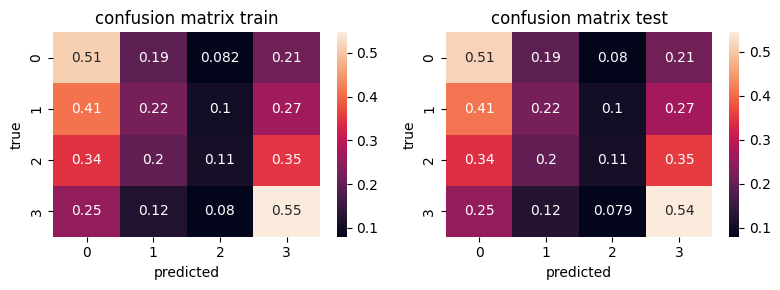

In [33]:
import seaborn as sns
for ax,i in subplots(2, usizex=4):
  if i==0: sns.heatmap(cm_tr, annot=True); plt.title("confusion matrix train")
  if i==1: sns.heatmap(cm_ts, annot=True); plt.title("confusion matrix test")
  plt.ylabel("true")
  plt.xlabel("predicted")

# Aplicar modelo al test.csv

In [35]:
datost = pd.read_csv("test.csv")
datost

,Unnamed: 0,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
0,0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Primaria completa,Si
1,1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No
2,2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,No
3,3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Primaria incompleta,No
4,4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No
...,...,...,...,...,...,...,...,...,...,...,...,...
296781,296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Primaria incompleta,Primaria incompleta,Si
296782,296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,Estrato 4,Si,Educación profesional completa,Educación profesional completa,No
296783,296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Educación profesional completa,No
296784,296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Educación profesional completa,No


In [36]:
datost_ids = datost['ID'].values
datost = datost[['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET']]
print ("shape of loaded dataframe", datost.shape)
datost.head()

shape of loaded dataframe (296786, 4)


,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET
0,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si
1,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si
2,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si
3,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No
4,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si


Preprocesado aplicado a test.csv

In [37]:
sum(datost.ESTU_VALORMATRICULAUNIVERSIDAD.isna()), sum(datost.ESTU_HORASSEMANATRABAJA.isna()), sum(datost.FAMI_ESTRATOVIVIENDA.isna()), sum(datost.FAMI_TIENEINTERNET.isna())

(2723, 13379, 13795, 11539)

In [38]:
datost.ESTU_VALORMATRICULAUNIVERSIDAD.values[datost.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
datost.ESTU_HORASSEMANATRABAJA.values[datost.ESTU_HORASSEMANATRABAJA.isna()] = 'no info'
datost.FAMI_ESTRATOVIVIENDA.values[datost.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'
datost.FAMI_TIENEINTERNET.values[datost.FAMI_TIENEINTERNET.isna()] = 'no info'
sum(datost.ESTU_VALORMATRICULAUNIVERSIDAD.isna()), sum(datost.ESTU_HORASSEMANATRABAJA.isna()), sum(datost.FAMI_ESTRATOVIVIENDA.isna()), sum(datost.FAMI_TIENEINTERNET.isna())

(0, 0, 0, 0)

In [39]:
vmatricula = {'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': 0.25,
 'Entre 500 mil y menos de 1 millón': 0.75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0,
 'no info': -1}

datost.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[vmatricula[i] for i in datost.ESTU_VALORMATRICULAUNIVERSIDAD]]
datost.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

<ipython-input-39-4b37f93befc2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datost.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[vmatricula[i] for i in datost.ESTU_VALORMATRICULAUNIVERSIDAD]]


,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,86923
3.25,55193
0.25,34589
0.75,33564
4.75,29855
7.75,29061
6.25,16558
0.00,8320
-1.00,2723


In [40]:
htra = {'0': 0,
    'Menos de 10 horas': 5,
    'Entre 11 y 20 horas': 15,
    'Entre 21 y 30 horas': 25,
    'Más de 30 horas': 35,
    'no info': -1}

datost.ESTU_HORASSEMANATRABAJA = np.r_[[htra[i] for i in datost.ESTU_HORASSEMANATRABAJA]]
datost.ESTU_HORASSEMANATRABAJA.value_counts()

<ipython-input-40-e39e5f9ecc08>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datost.ESTU_HORASSEMANATRABAJA = np.r_[[htra[i] for i in datost.ESTU_HORASSEMANATRABAJA]]


,count
ESTU_HORASSEMANATRABAJA,
35,106189
0,50422
15,49386
25,39931
5,37479
-1,13379


In [41]:
datost.FAMI_ESTRATOVIVIENDA = ['no info' if i in ['Sin Estrato'] else i for i in datost.FAMI_ESTRATOVIVIENDA.values]

<ipython-input-41-1ae3457b401c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datost.FAMI_ESTRATOVIVIENDA = ['no info' if i in ['Sin Estrato'] else i for i in datost.FAMI_ESTRATOVIVIENDA.values]


In [42]:
datost.FAMI_ESTRATOVIVIENDA.value_counts()

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,99288
Estrato 3,90719
Estrato 1,48092
Estrato 4,27823
no info,15219
Estrato 5,10194
Estrato 6,5451


In [43]:
estrato = {'Estrato 1': 1,
 'Estrato 2': 2,
 'Estrato 3': 3,
 'Estrato 4': 4,
 'Estrato 5': 5,
 'Estrato 6': 6,
 'no info': -1}

datost.FAMI_ESTRATOVIVIENDA = np.r_[[estrato[i] for i in datost.FAMI_ESTRATOVIVIENDA]]
datost.FAMI_ESTRATOVIVIENDA.value_counts()

<ipython-input-43-b09e88dd69e1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datost.FAMI_ESTRATOVIVIENDA = np.r_[[estrato[i] for i in datost.FAMI_ESTRATOVIVIENDA]]


,count
FAMI_ESTRATOVIVIENDA,
2,99288
3,90719
1,48092
4,27823
-1,15219
5,10194
6,5451


In [44]:
f = datost.FAMI_TIENEINTERNET.values
FAMI_TIENEINTERNET_vals = sorted(np.unique(f))
FAMI_TIENEINTERNET_onehot_vals = {val: np.eye(len(FAMI_TIENEINTERNET_vals))[i] for i,val in enumerate(FAMI_TIENEINTERNET_vals)}
FAMI_TIENEINTERNET_onehot_vals

{'No': array([1., 0., 0.]),
 'Si': array([0., 1., 0.]),
 'no info': array([0., 0., 1.])}

In [45]:
FAMI_TIENEINTERNET_onehot_enc = np.r_[[FAMI_TIENEINTERNET_onehot_vals[i] for i in datost.FAMI_TIENEINTERNET]]
FAMI_TIENEINTERNET_onehot_enc

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [46]:
FAMI_TIENEINTERNET_df = pd.DataFrame(FAMI_TIENEINTERNET_onehot_enc, columns=[f"FAMI_TIENEINTERNET__{v}" for v in FAMI_TIENEINTERNET_onehot_vals])
FAMI_TIENEINTERNET_df

,FAMI_TIENEINTERNET__No,FAMI_TIENEINTERNET__Si,FAMI_TIENEINTERNET__no info
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
296781,0.0,1.0,0.0
296782,0.0,1.0,0.0
296783,0.0,1.0,0.0
296784,0.0,1.0,0.0


In [47]:
datost = pd.concat([FAMI_TIENEINTERNET_df, datost], axis=1).drop('FAMI_TIENEINTERNET', axis=1)
datost.shape

(296786, 6)

In [48]:
datost.head()

,FAMI_TIENEINTERNET__No,FAMI_TIENEINTERNET__Si,FAMI_TIENEINTERNET__no info,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA
0,0.0,1.0,0.0,0.25,5,3
1,0.0,1.0,0.0,3.25,25,2
2,0.0,1.0,0.0,1.75,0,3
3,1.0,0.0,0.0,1.75,25,1
4,0.0,1.0,0.0,3.25,15,2


Construccion modelo

In [49]:
X_test_data = datost[sorted(datost.columns)].values
X_test_data.shape

(296786, 6)

In [50]:
preds_test_data = lr.predict(X_test_data)

Cargar submission

In [51]:
rmapi = {v:k for k,v in rg.items()}
text_preds_test_data = [rmapi[i] for i in preds_test_data]

In [52]:
submission = pd.DataFrame([datost_ids, text_preds_test_data], index = ['ID', 'RENDIMIENTO_GLOBAL']).T
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,bajo
1,98545,medio-bajo
2,499179,alto
3,782980,bajo
4,785185,medio-alto
...,...,...
296781,496981,medio-bajo
296782,209415,alto
296783,239074,medio-alto
296784,963852,alto


In [53]:
submission.to_csv("my_submission.csv", index=False)

In [54]:
!head my_submission.csv

ID,RENDIMIENTO_GLOBAL
550236,bajo
98545,medio-bajo
499179,alto
782980,bajo
785185,medio-alto
58495,bajo
705444,alto
557548,alto
519909,bajo


In [55]:
submission.shape

(296786, 2)

Enviar a kaggle

In [56]:
!kaggle competitions submit -c udea-ai4eng-20242 -f my_submission.csv -m "Gabriela jimenez submission with linear model"

100% 3.83M/3.83M [00:00<00:00, 13.9MB/s]
Successfully submitted to UDEA/ai4eng 20242 - Pruebas Saber Pro Colombia